In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras

In [4]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [5]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)

In [26]:
data = pd.read_csv("datasets/BRITANNIA.csv")
print(data.head())

         Date     Symbol Series  Prev Close   Open    High    Low   Last  \
0  2000-01-03  BRITANNIA     EQ      703.25  705.0  759.50  705.0  758.0   
1  2000-01-04  BRITANNIA     EQ      756.90  710.0  770.00  710.0  740.0   
2  2000-01-05  BRITANNIA     EQ      754.55  755.0  759.00  705.0  740.0   
3  2000-01-06  BRITANNIA     EQ      735.30  740.0  794.15  740.0  770.0   
4  2000-01-07  BRITANNIA     EQ      785.65  808.0  848.50  798.0  848.5   

    Close    VWAP  Volume      Turnover  Trades  Deliverable Volume  \
0  756.90  741.01    7512  5.566488e+11     NaN                 NaN   
1  754.55  742.52    8135  6.040391e+11     NaN                 NaN   
2  735.30  739.92    6095  4.509784e+11     NaN                 NaN   
3  785.65  788.83   19697  1.553756e+12     NaN                 NaN   
4  848.50  827.53   33107  2.739708e+12     NaN                 NaN   

   %Deliverble  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  


In [27]:
data['Date'] = pd.to_datetime(data['Date'],format='%Y-%m-%d')
data.index = data['Date']

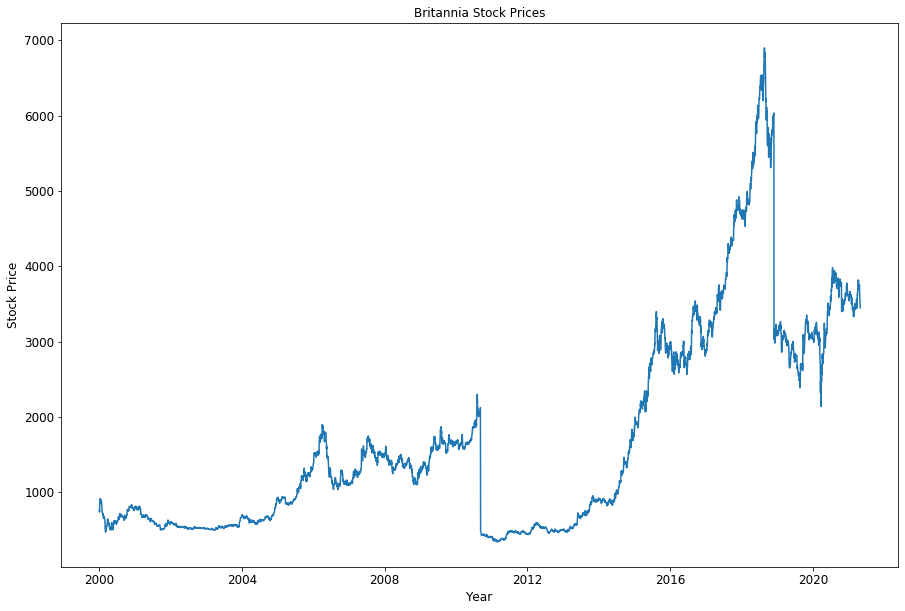

In [8]:
plt.figure(figsize=(15,10))
plt.plot(data['Close'])
plt.title("Britannia Stock Prices")
plt.xlabel("Year")
plt.ylabel("Stock Price")
plt.show()

In [28]:
data = data.iloc[:,4].values
print(data)

[ 705.    710.    755.   ... 3488.   3496.75 3460.  ]


In [30]:
data = data.reshape(-1,1)
print(data)

[[ 705.  ]
 [ 710.  ]
 [ 755.  ]
 ...
 [3488.  ]
 [3496.75]
 [3460.  ]]


In [31]:
from sklearn.model_selection import train_test_split
training_set, test_set = train_test_split(data, test_size=0.2, shuffle=False, random_state=42)

In [32]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [34]:
print(X_train)

[[[0.11370894]
  [0.11526659]
  [0.1292855 ]
  ...
  [0.08380193]
  [0.09349055]
  [0.09782084]]

 [[0.11526659]
  [0.1292855 ]
  [0.12461253]
  ...
  [0.09349055]
  [0.09782084]
  [0.08878643]]

 [[0.1292855 ]
  [0.12461253]
  [0.14579666]
  ...
  [0.09782084]
  [0.08878643]
  [0.0884749 ]]

 ...

 [[0.9241577 ]
  [0.91711709]
  [0.92742878]
  ...
  [0.78661661]
  [0.80375084]
  [0.79720868]]

 [[0.91711709]
  [0.92742878]
  [0.93303634]
  ...
  [0.80375084]
  [0.79720868]
  [0.79284724]]

 [[0.92742878]
  [0.93303634]
  [0.91288026]
  ...
  [0.79720868]
  [0.79284724]
  [0.8239848 ]]]


In [39]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train,y_train, epochs=50, batch_size=32)

Epoch 1/50
131/131 [==============================] - 27s 130ms/step - loss: 0.0081
Epoch 2/50
131/131 [==============================] - 17s 129ms/step - loss: 0.0028
Epoch 3/50
131/131 [==============================] - 17s 128ms/step - loss: 0.0023
Epoch 4/50
131/131 [==============================] - 17s 129ms/step - loss: 0.0022
Epoch 5/50
131/131 [==============================] - 17s 128ms/step - loss: 0.0018
Epoch 6/50
131/131 [==============================] - 17s 127ms/step - loss: 0.0018
Epoch 7/50
131/131 [==============================] - 17s 127ms/step - loss: 0.0016
Epoch 8/50
131/131 [==============================] - 17s 128ms/step - loss: 0.0015
Epoch 9/50
131/131 [==============================] - 17s 127ms/step - loss: 0.0015
Epoch 10/50
131/131 [==============================] - 17s 128ms/step - loss: 0.0016
Epoch 11/50
131/131 [==============================] - 17s 128ms/step - loss: 0.0013
Epoch 12/50
131/131 [==============================] - 17s 127ms/step - lo

In [74]:
inputs = data[len(data)-len(test_set)-60:]
inputs = inputs.reshape(-1,1)
test_set_scaled = sc.transform(inputs)
X_test = []
for i in range(60, len(test_set_scaled)):
    X_test.append(test_set_scaled[i-60:i, 0])
    

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [75]:
preds = model.predict(X_test)
preds = sc.inverse_transform(preds)

In [47]:
data2 = pd.read_csv("datasets/BRITANNIA.csv")

In [51]:
print(data2)

            Date     Symbol Series  Prev Close     Open     High     Low  \
0     2000-01-03  BRITANNIA     EQ      703.25   705.00   759.50   705.0   
1     2000-01-04  BRITANNIA     EQ      756.90   710.00   770.00   710.0   
2     2000-01-05  BRITANNIA     EQ      754.55   755.00   759.00   705.0   
3     2000-01-06  BRITANNIA     EQ      735.30   740.00   794.15   740.0   
4     2000-01-07  BRITANNIA     EQ      785.65   808.00   848.50   798.0   
...          ...        ...    ...         ...      ...      ...     ...   
5300  2021-04-26  BRITANNIA     EQ     3650.30  3661.10  3662.00  3531.0   
5301  2021-04-27  BRITANNIA     EQ     3539.20  3572.70  3574.60  3517.0   
5302  2021-04-28  BRITANNIA     EQ     3541.20  3488.00  3527.00  3469.0   
5303  2021-04-29  BRITANNIA     EQ     3478.75  3496.75  3505.90  3447.0   
5304  2021-04-30  BRITANNIA     EQ     3468.90  3460.00  3468.35  3437.0   

        Last    Close     VWAP   Volume      Turnover   Trades  \
0      758.0   756.90

In [55]:
from sklearn.model_selection import train_test_split
training_set_2, test_set_2 = train_test_split(data2, test_size=0.2, shuffle=False, random_state=42)

C:\Users\91981\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


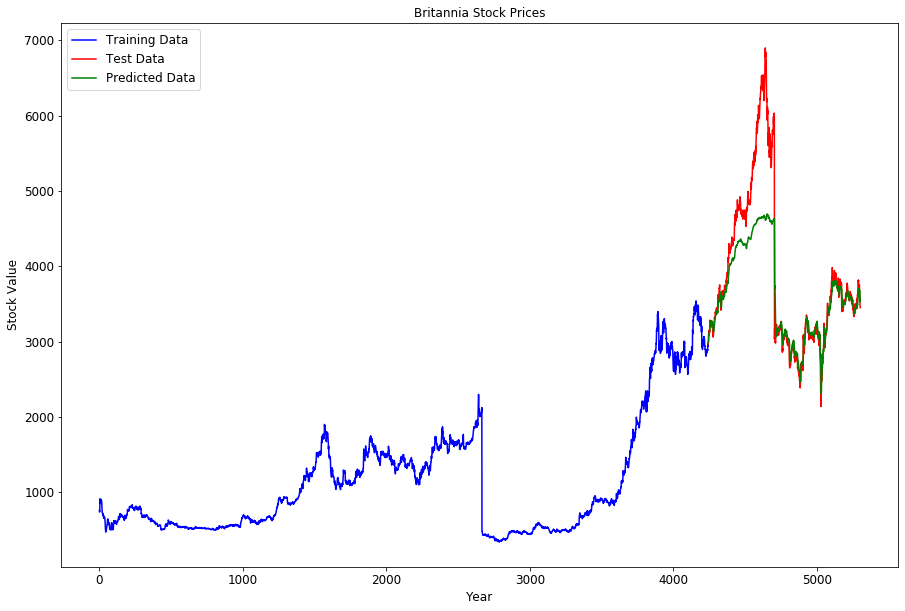

In [77]:
test_set_2['Predictions'] = preds
plt.figure(figsize=(15,10))
plt.plot(training_set_2['Close'], color='blue', label='Training Data')
plt.plot(test_set_2['Close'], color='red', label='Test Data')
plt.plot(test_set_2['Predictions'], color='green', label='Predicted Data')
plt.legend(prop={'size': 12})
plt.xlabel("Year")
plt.ylabel("Stock Value")
plt.title("Britannia Stock Prices")
plt.show()

In [79]:
rms=np.sqrt(np.mean(np.power((np.array(test_set_2['Close'])-test_set_2['Predictions']),2)))
print(rms)

564.2476620716061
